In [6]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import glob
import os

# Define some colors
noaa_blue = '#1D70B7'
usgs_green = '#2E8B57'
delft_blue = '#006699'

%run -i "D:/crs/src/NOPP_comparison/storm_coords.py"
%run -i "D:/crs/src/NOPP_comparison/scat_stats.py"

# Target date
#TODO - Is this good?
start_date = np.datetime64('2024-09-25 00:00:00')
end_date = np.datetime64('2024-09-30 00:00:00')

home_dir = 'D:/crs/proj/2025_NOPP_comparison/'
wl_obs_dir = home_dir+'helene_water_level/'

wl_file_list = glob.glob(wl_obs_dir + '*.nc')
wl_sta_list = []
for item in wl_file_list:
    wl_sta_list.append( os.path.splitext(os.path.basename(item))[0][0:10])
print(wl_sta_list)
print("No. wl_sta_list:",len(wl_sta_list))  

deltares_file_list = glob.glob(home_dir+'helene_deltares_model_comparison/'+'F*.csv')
deltares_sta_list = []
for item in deltares_file_list:
    deltares_sta_list.append( os.path.splitext(os.path.basename(item))[0] )
    
print(deltares_sta_list)
print("No. Deltares_sta_list:",len(deltares_sta_list))  

# Find matching statsion
matches = list(set(wl_sta_list) & set(deltares_sta_list))
print("No. matches:",len(matches))
print(matches)

['FLBAY30540', 'FLCIT35742', 'FLDIX25020', 'FLFRA26262', 'FLHER35741', 'FLLEV35745', 'FLPAS35743', 'FLPIN26405', 'FLPIN31148', 'FLSAR25010', 'FLSAR26282', 'FLTAY35738', 'FLTAY35739', 'FLWAK29937']
No. wl_sta_list: 14
['FLBAY03331', 'FLBAY30540', 'FLBAY35744', 'FLCIT35742', 'FLDIX25020', 'FLFRA26262', 'FLFRA29933', 'FLGUL26254', 'FLHER35741', 'FLLEE20980', 'FLLEV27481', 'FLLEV35745', 'FLPAS35743', 'FLPIN26405', 'FLPIN31148', 'FLPIN33472', 'FLPIN35746', 'FLSAR25010', 'FLSAR26282', 'FLTAY03355', 'FLTAY35738', 'FLTAY35739', 'FLWAK29937']
No. Deltares_sta_list: 23
No. matches: 14
['FLDIX25020', 'FLSAR26282', 'FLHER35741', 'FLTAY35739', 'FLBAY30540', 'FLPIN31148', 'FLCIT35742', 'FLLEV35745', 'FLPAS35743', 'FLTAY35738', 'FLWAK29937', 'FLFRA26262', 'FLPIN26405', 'FLSAR25010']


0 FLDIX25020
Obs. first and last times:  2024-09-26T00:00:00.000000000 2024-10-01T23:59:29.750000128
Deltares first and last times:  2024-09-25 00:00:00 2024-09-28 00:00:00
1 FLSAR26282
Obs. first and last times:  2024-09-26T00:00:00.000000000 2024-09-29T23:59:29.875000064
Deltares first and last times:  2024-09-25 00:00:00 2024-09-28 00:00:00
2 FLHER35741
Obs. first and last times:  2024-09-26T04:00:00.000000000 2024-09-28T19:09:59.750000128
Deltares first and last times:  2024-09-25 00:00:00 2024-09-28 00:00:00
3 FLTAY35739
Obs. first and last times:  2024-09-26T00:00:00.000000000 2024-09-27T23:59:59.750000128
Deltares first and last times:  2024-09-25 00:00:00 2024-09-28 00:00:00
4 FLBAY30540
Obs. first and last times:  2024-09-26T01:00:00.000000000 2024-09-27T17:59:59.750000128
Deltares first and last times:  2024-09-25 00:00:00 2024-09-28 00:00:00
5 FLPIN31148
Obs. first and last times:  2024-09-25T00:00:00.000000000 2024-09-30T17:59:59.750000128
Deltares first and last times:  20

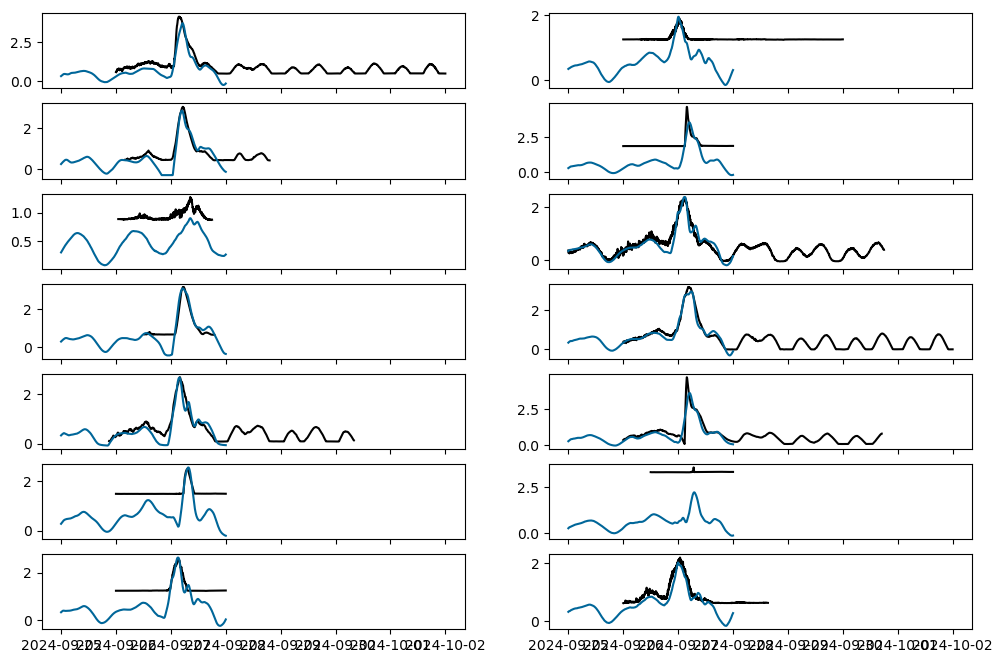

In [7]:
fig, ax = plt.subplots( 7, 2, sharex=True, sharey=False, figsize=( 12, 8 ) )
axf = ax.flatten()
for i, sta in enumerate( matches ):
    print(i, sta)
    obs_url = wl_obs_dir+sta+'_2024_Helene_Butterworth_stormtide_unfiltered.nc'
    deltares_url =  'D:/crs/proj/2025_NOPP_comparison/helene_deltares_model_comparison/'+sta+'.csv'
    obs_ds = xr.open_dataset( obs_url )
    obs_time = obs_ds['time']
    obs_wl = obs_ds['water_surface_height_above_reference_datum']
    first_time = obs_time[0].values
    last_time = obs_time[-1].values
    print('Obs. first and last times: ',first_time, last_time)

    deltares_df = pd.read_csv( deltares_url )
    deltares_df['time']=pd.to_datetime(deltares_df['time'])
    deltares_time = deltares_df['time']
    deltares_wl = deltares_df['mod']
    print('Deltares first and last times: ',deltares_time.iloc[0], deltares_time.iloc[-1] )

    axf[i].plot(obs_time, obs_wl, '-k')
    axf[i].plot(deltares_time, deltares_wl, '-',c=delft_blue)

    

In [ ]:
axf[0]